In [1]:
import utils
import augment
import numpy as np
from model_03 import get_model
import losses
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ProgbarLogger
from keras import optimizers
from datetime import datetime
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [3]:
img_size = 256
n_kernels = 6
d_train = "./data/{}/train/".format(img_size)
d_test = "./data/{}/test".format(img_size)
files = utils.get_files(d_train, verbose=False)
n_valid = int(len(files) * 0.15)
files_valid = files[:n_valid]
files_train = files[n_valid:]
d = datetime.now().strftime("%m_%d_%Y_%H_%M_%S")
f_model = "model_{}.h5".format(d)

In [4]:
X_train, Y_train = utils.load_data(files_train)
X_valid, Y_valid = utils.load_data(files_valid) 

Loading data...
samples    301
Img size  ( 256, 256)
size      0.32 GB
Loading data...
samples     52
Img size  ( 256, 256)
size      0.05 GB


In [5]:
n_ones = np.sum(Y_train) + np.sum(Y_valid)
n_total = np.prod(Y_train.shape) + np.prod(Y_valid.shape)
n_zeros = n_total - n_ones
weights_zero = n_ones / n_total
weights_ones = n_zeros / n_total
print("Ones:  ", n_ones)
print("zeros: ", n_zeros)
print("Total: ", n_total)
print("1/T:   ", weights_zero)
print("0/T:   ", weights_ones)
print("n0 * w0 : n1 * w1 = {} : {}".format(n_ones * weights_ones, n_zeros * weights_zero))

Ones:   193767.0
zeros:  22940441.0
Total:  23134208
1/T:    0.00837577841437
0/T:    0.991624221586
n0 * w0 : n1 * w1 = 192144.05054398233 : 192144.0505439823


In [6]:
model = get_model(img_size, n_kernels)
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv_1_1 (Conv2D)               (None, 256, 256, 6)  168         input_1[0][0]                    
__________________________________________________________________________________________________
conv_2_2 (Conv2D)               (None, 256, 256, 6)  330         conv_1_1[0][0]                   
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 128, 128, 6)  0           conv_2_2[0][0]                   
__________________________________________________________________________________________________
conv2_1 (C

/home/matthias/projects/bio-unet/model_03.py:87: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input=inputs, output=conv10)


In [7]:
model.compile(loss=losses.make_bce_loss(weights_ones, weights_zero),
              optimizer=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.99, nesterov=True),
              metrics=['accuracy'])
callbacks = [
             EarlyStopping(monitor='val_loss',
                           patience=4,
                           verbose=1),
             ModelCheckpoint(f_model,
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)]

In [8]:
#f_model = "model_04_23_2019_17_00_16.h5"
if os.path.isfile(f_model) and True:
    model.load_weights(f_model)
hist = model.fit(x=X_train,
                 y=Y_train,
                 batch_size=len(files_train),
                 epochs=100,
                 verbose=2, callbacks=callbacks,
                 validation_data=(X_valid, Y_valid))

Train on 301 samples, validate on 52 samples
Epoch 1/100
 - 56s - loss: 0.0126 - acc: 0.0084 - val_loss: 0.0122 - val_acc: 0.0085

Epoch 00001: val_loss improved from inf to 0.01222, saving model to model_04_23_2019_17_03_05.h5
Epoch 2/100
 - 57s - loss: 0.0126 - acc: 0.0084 - val_loss: 0.0122 - val_acc: 0.0085

Epoch 00002: val_loss improved from 0.01222 to 0.01222, saving model to model_04_23_2019_17_03_05.h5
Epoch 3/100
 - 61s - loss: 0.0126 - acc: 0.0084 - val_loss: 0.0122 - val_acc: 0.0085

Epoch 00003: val_loss improved from 0.01222 to 0.01222, saving model to model_04_23_2019_17_03_05.h5
Epoch 4/100
 - 60s - loss: 0.0126 - acc: 0.0084 - val_loss: 0.0122 - val_acc: 0.0085

Epoch 00004: val_loss improved from 0.01222 to 0.01222, saving model to model_04_23_2019_17_03_05.h5
Epoch 5/100
 - 58s - loss: 0.0126 - acc: 0.0084 - val_loss: 0.0122 - val_acc: 0.0085

Epoch 00005: val_loss improved from 0.01222 to 0.01222, saving model to model_04_23_2019_17_03_05.h5
Epoch 6/100
 - 57s - los


Epoch 00044: val_loss improved from 0.01185 to 0.01184, saving model to model_04_23_2019_17_03_05.h5
Epoch 45/100
 - 57s - loss: 0.0123 - acc: 0.0091 - val_loss: 0.0118 - val_acc: 0.0097

Epoch 00045: val_loss improved from 0.01184 to 0.01182, saving model to model_04_23_2019_17_03_05.h5
Epoch 46/100
 - 56s - loss: 0.0123 - acc: 0.0094 - val_loss: 0.0118 - val_acc: 0.0101

Epoch 00046: val_loss improved from 0.01182 to 0.01181, saving model to model_04_23_2019_17_03_05.h5
Epoch 47/100
 - 57s - loss: 0.0123 - acc: 0.0097 - val_loss: 0.0118 - val_acc: 0.0106

Epoch 00047: val_loss improved from 0.01181 to 0.01180, saving model to model_04_23_2019_17_03_05.h5
Epoch 48/100
 - 59s - loss: 0.0123 - acc: 0.0102 - val_loss: 0.0118 - val_acc: 0.0112

Epoch 00048: val_loss improved from 0.01180 to 0.01178, saving model to model_04_23_2019_17_03_05.h5
Epoch 49/100
 - 56s - loss: 0.0123 - acc: 0.0108 - val_loss: 0.0118 - val_acc: 0.0119

Epoch 00049: val_loss improved from 0.01178 to 0.01177, sav

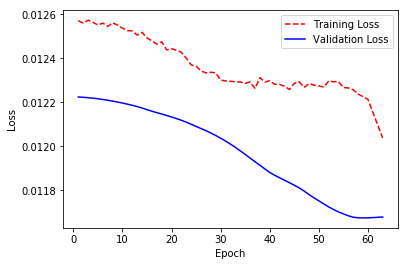

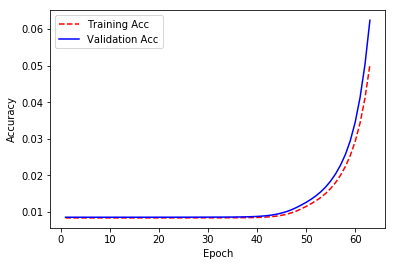

In [9]:
training_loss = hist.history['loss']
test_loss = hist.history['val_loss']
training_acc = hist.history['acc']
test_acc = hist.history['val_acc']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [ ]:
X, Y = 